In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.read_csv?

In [3]:
df = pd.read_csv('C:/Users/aydin/Desktop/data/btc-market-price.csv')

In [4]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [5]:
df = pd.read_csv('C:/Users/aydin/Desktop/data/btc-market-price.csv', header=None)

In [6]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


The CSV file we're reading has only two columns: `timestamp` and `price`. It doesn't have a header,...

In [7]:
df = pd.read_csv('C:/Users/aydin/Desktop/data/btc-market-price.csv', header=None)

In [8]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [9]:
df.columns = ['Timestamp','Price']

In [10]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [11]:
df.shape

(365, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [13]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [16]:
df.set_index('Timestamp',inplace=True)

In [17]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [18]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

 ### Putting everything together

In [19]:
df = pd.read_csv('C:/Users/aydin/Desktop/data/btc-market-price.csv', header=None)
df.columns = ['Timestamp','Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp',inplace=True)

In [20]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


The `read_csv` function is extremley powerful and you can specify many more parameters at import time.We can achive the same results with only one line by doing:

In [21]:
df = pd.read_csv('C:/Users/aydin/Desktop/data/btc-market-price.csv',
    header = None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [22]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [23]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### Plotting Basics

<AxesSubplot:xlabel='Timestamp'>

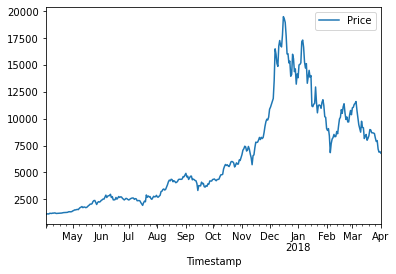

In [24]:
df.plot()

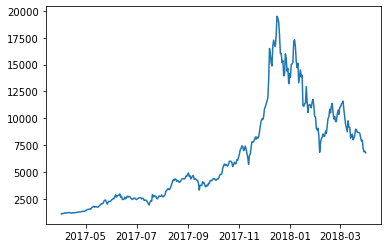

In [25]:
plt.plot(df.index,df['Price'])

`plt.plot()` accepts many parameters, but the fist two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

In [26]:
x = np.arange(-10,11)

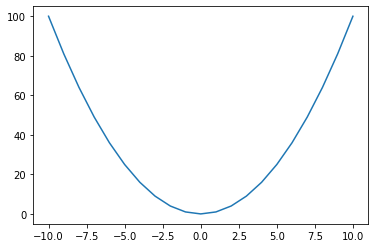

In [27]:
plt.plot(x, x ** 2)

Text(0.5, 1.0, 'My Nice Plot')

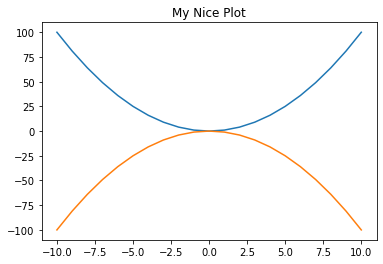

In [28]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))
plt.title('My Nice Plot')

<AxesSubplot:title={'center':'Bitcoin Price 2017-2018'}, xlabel='Timestamp'>

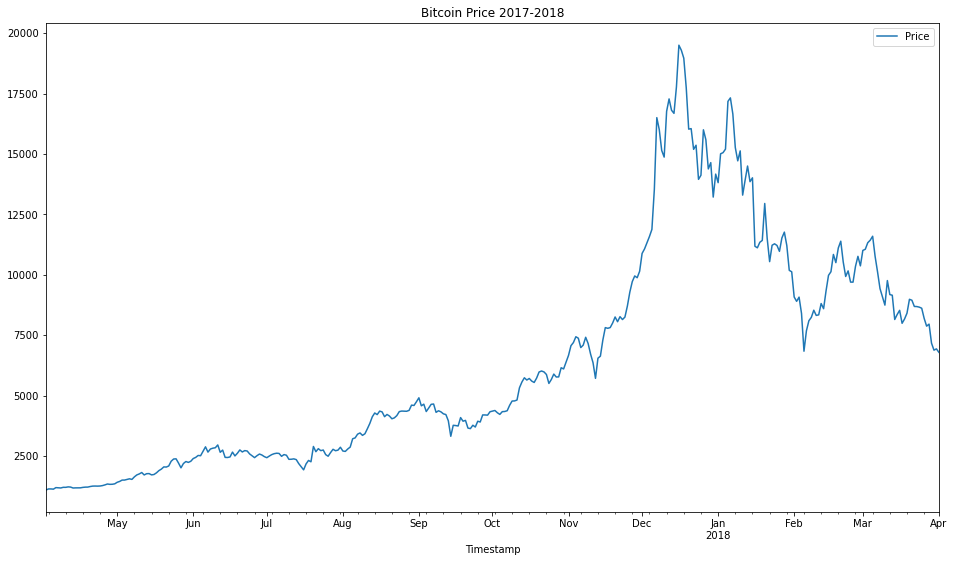

In [29]:
df.plot(figsize=(16,9), title='Bitcoin Price 2017-2018')

### More challenging parsing

In [31]:
eth = pd.read_csv('C:/Users/aydin/Desktop/data/eth-price.csv')
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [32]:
eth = pd.read_csv('C:/Users/aydin/Desktop/data/eth-price.csv',parse_dates=True)
print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [33]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

In [34]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [36]:
eth = pd.read_csv('C:/Users/aydin/Desktop/data/eth-price.csv',parse_dates=True, index_col=0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [37]:
prices = pd.DataFrame(index=df.index)

In [38]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [39]:
prices['Bitcoin'] = df['Price']

In [40]:
prices['Ether'] = eth['Value']

In [41]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

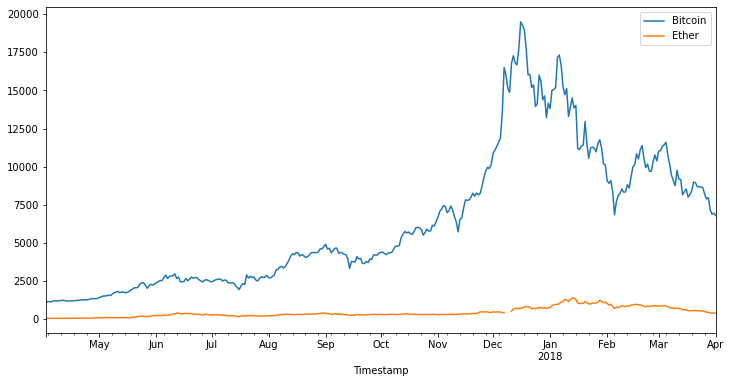

In [42]:
prices.plot(figsize=(12,6))

<AxesSubplot:xlabel='Timestamp'>

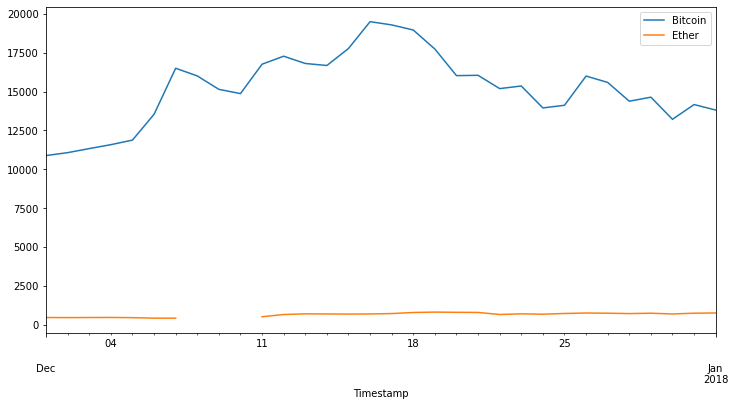

In [43]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12,6))